<a href="https://colab.research.google.com/github/ua-datalab/Geospatial_Workshops/blob/main/notebooks/detecto_geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses **detecto**, a lightweight Python library that will allow us to create a convolutional neural network object detection model in very few lines of code. It downloads a pre-trained Faster R-CNN ResNet50 FPN from Pytorch as the starting point. We then use an existing labeled training dataset to fine-tune the model to identify 10 different objects from aerial imagery.

In [1]:
# install the required libraries to the virtual machine (! indicates install to underlying computer)
!pip install detecto --quiet
!pip install pascal-voc-writer --quiet

### Run the pre-trained model on some test imagery

--2024-09-19 00:32:05--  https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/airplane_test.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3119258 (3.0M) [image/png]
Saving to: ‘airplane_test.png.6’

airplane_test.png.6 100%[===================>]   2.97M  --.-KB/s    in 0.05s   

2024-09-19 00:32:05 (63.4 MB/s) - ‘airplane_test.png.6’ saved [3119258/3119258]



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


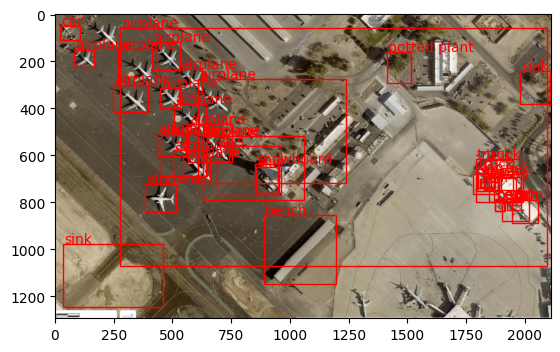

In [4]:
from detecto.core import Model
from detecto.utils import read_image
from detecto.visualize import show_labeled_image

!wget https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/airplane_test.png
image = read_image('airplane_test.png')

model = Model()
labels, boxes, scores = model.predict(image)
show_labeled_image(image, boxes, labels)



--2024-09-19 00:33:44--  https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/vehicle_test2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2200853 (2.1M) [image/png]
Saving to: ‘vehicle_test2.png.1’

vehicle_test2.png.1 100%[===================>]   2.10M  --.-KB/s    in 0.05s   

2024-09-19 00:33:44 (42.7 MB/s) - ‘vehicle_test2.png.1’ saved [2200853/2200853]



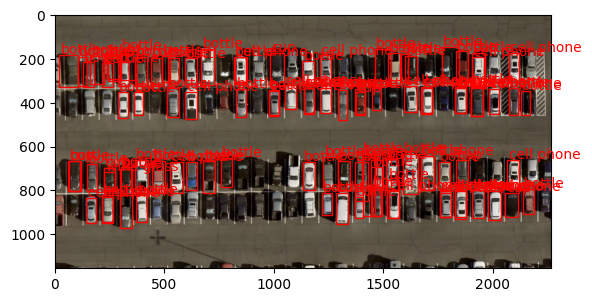

In [5]:
!wget https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/vehicle_test2.png

image = read_image('vehicle_test2.png')
labels, boxes, scores = model.predict(image)
show_labeled_image(image, boxes, labels)

--2024-09-19 00:35:31--  https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/baseball_field_test.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3431791 (3.3M) [image/png]
Saving to: ‘baseball_field_test.png.1’

baseball_field_test 100%[===================>]   3.27M  --.-KB/s    in 0.05s   

2024-09-19 00:35:31 (59.6 MB/s) - ‘baseball_field_test.png.1’ saved [3431791/3431791]



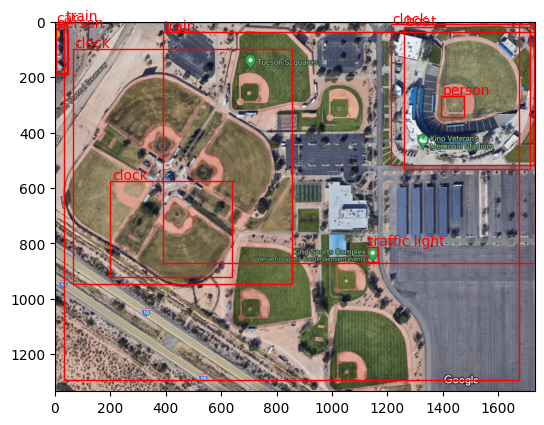

In [6]:
!wget https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/baseball_field_test.png

image = read_image('baseball_field_test.png')
labels, boxes, scores = model.predict(image)
show_labeled_image(image, boxes, labels)

### Get Training Dataset
The [NWPU VHR-10 dataset](https://github.com/chaozhong2010/VHR-10_dataset_coco) is a very high resolution (VHR) aerial imagery dataset that consists of 800 total images. The dataset has has ten classes of labeled objects: 1. airplane(757), 2. ship(302), 3. storage tank(655), 4. baseball diamond(390), 5. tennis court(524), 6. basketball court(159), 7. ground track field(163), 8. harbor(224), 9. bridges(124), and 10. vehicle(477).

In [2]:
#Download the labeled training data set (NWPU_VHR-10.tar) from github
!wget https://github.com/ua-datalab/Geospatial_Workshops/raw/main/data/NWPU_VHR-10.tar

--2024-09-18 23:14:58--  https://github.com/ua-datalab/Geospatial_Workshops/raw/main/data/NWPU_VHR-10.tar
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/NWPU_VHR-10.tar [following]
--2024-09-18 23:14:59--  https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/NWPU_VHR-10.tar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77957120 (74M) [application/octet-stream]
Saving to: ‘NWPU_VHR-10.tar’

NWPU_VHR-10.tar     100%[===================>]  74.35M   112MB/s    in 0.7s    

2024-09-18 23:15:02 (112 MB/s) - ‘NWPU_VHR-10.tar’ saved [77

### The next line of code will decompress the tar file and give you access to the imagery and labels.

Within the root directory (NWPU_VHR-10_dataset), the subdirectory *positive_image_set* has 650 jpg images with each image containing at least one target object. The subdirectory *ground_truth* contains a a text file corresponding to each image. Each line of those text files defines a ground truth bounding box in the following format:
(x1,y1),(x2,y2),a

where (x1,y1) denotes the top-left coordinate of the bounding box, (x2,y2) denotes the right-bottom coordinate of the bounding box, and a is the object class (1-airplane, 2-ship, 3-storage tank, 4-baseball diamond, 5-tennis court, 6-basketball court, 7-ground track field, 8-harbor, 9-bridge, 10-vehicle).

In [25]:
#Decompress the labeled training data tar file
!tar -xvf NWPU_VHR-10.tar

tar: unrecognized option '--quiet'
Try 'tar --help' or 'tar --usage' for more information.


### Convert labeled dataset to Pascal VOC Format

**detecto** requires that the dataset is labeled in the [Pascal VOC format](http://host.robots.ox.ac.uk/pascal/VOC/). In this dataset, the labels for the images are stored in plain text files, so we will first convert the data to the required format.


In [4]:
#Import the required tools

import os # used for looking through directories
import re # search in strings
from pascal_voc_writer import Writer # create the .xml files with the VOC format
from PIL import Image # used to get height, width of images

In [5]:
# get a list of the text file names
base = './NWPU_VHR-10_dataset'
txt_files = os.listdir(os.path.join(base, 'ground_truth'))

In [6]:
#Create a dictionary that maps the class number to the class name.

classes = {
    1: 'airplane',
    2: 'ship',
    3: 'storage tank',
    4: 'baseball diamond',
    5: 'tennis court',
    6: 'basketball court',
    7: 'ground track field',
    8: 'harbor',
    9: 'bridge',
    10: 'vehicle'
}

print(type(classes))

<class 'dict'>


In [7]:
# loop through each ground truth text file and convert to Pascal VOC format.
# This will create a new xml file for each image and will save it in the directory 'positive_image_set'
for txt in txt_files:
    # open the text file for reading
    with open(os.path.join(base, 'ground_truth', txt), 'r') as reader:

        # locate and open corresponding image
        img_id, _ = txt.split('.')
        img_path = os.path.join(base, 'positive_image_set', f'{img_id}.jpg')
        img = Image.open(img_path)

        # create a writer for the xml file
        xml_path = os.path.join(base, 'positive_image_set', f'{img_id}.xml')
        writer = Writer(img_path, img.width, img.height)

        # convert the text file to an xml file and save
        lines = reader.readlines()
        for line in lines:
            numbers = re.findall(r'\d+', line)
            if not numbers: # skip empty lines
                continue
            xmin, ymin, xmax, ymax, class_id = list(map(int, numbers))
            writer.addObject(classes[class_id], xmin, ymin, xmax, ymax)
        writer.save(xml_path)

### Load training images into Datasets
Next, we load the 650 images into 'datasets'


In [8]:
# Import necessary module
from detecto.core import Dataset

# create the datasets
dataset = Dataset(os.path.join(base, 'positive_image_set/'))

### Create a random split of training and validation data from the dataset

In [ ]:
import torch
from torch.utils.data import random_split

# this sets the seed of the random generator to ensure reproducibility
random_generator = torch.Generator().manual_seed(42)

# Split the dataset into 80% training and 20% validation
train_dataset, val_dataset = random_split(dataset, [0.8, 0.2])

### Display the training images and labels
**detecto** provides a visualization function that will display the image along with bounding boxes and labels for the objects it contains.

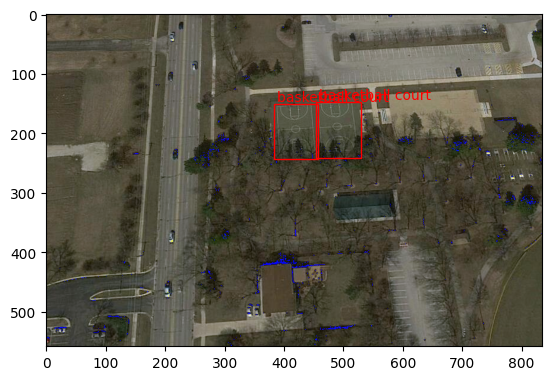

In [27]:
from detecto.visualize import show_labeled_image

# show some of the training data. Change the [121] to other numbers to see other images.
image, targets = train_dataset[121]
show_labeled_image(image, targets['boxes'], targets['labels'])

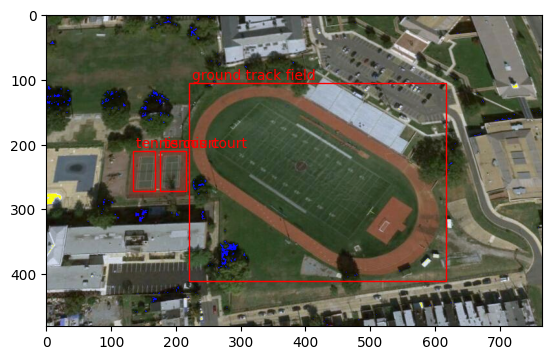

In [13]:
# we can also visualize the validation dataset
image, targets = val_dataset[1]
show_labeled_image(image, targets['boxes'], targets['labels'])

## Train the Model
With the data loaded, we can now train the model. Here, we use a DataLoader to wrap the Dataset object. This allows us to specify the batch size used during each training step, one of a few hyperparameters we can play with during fine tuning.

Note that we are required to tell **detecto** which labels we are interested in learning to identify.

In [14]:
#import necessary modules
from detecto.core import DataLoader, Model

# wrap the training set in a DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# specify all unique labels you're trying to predict
labels = [
    'airplane',
    'ship',
    'storage tank',
    'baseball diamond',
    'tennis court',
    'basketball court',
    'ground track field',
    'harbor',
    'bridge',
    'vehicle'
]

In [15]:
# initialize a model with the target labels and fit the model
# This step will take some time and is accelerated with GPU
model = Model(labels)
losses = model.fit(train_loader,
                   val_dataset,
                   epochs=8,
                   lr_step_size=5,
                   learning_rate=0.001,
                   verbose=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:06<00:00, 24.1MB/s]


It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 8
Begin iterating over training dataset


  1%|          | 3/260 [03:23<4:50:26, 67.81s/it]


KeyboardInterrupt: 

Here we perform a sanity check to ensure that the training process is working correctly by checking that the loss is decreasing.

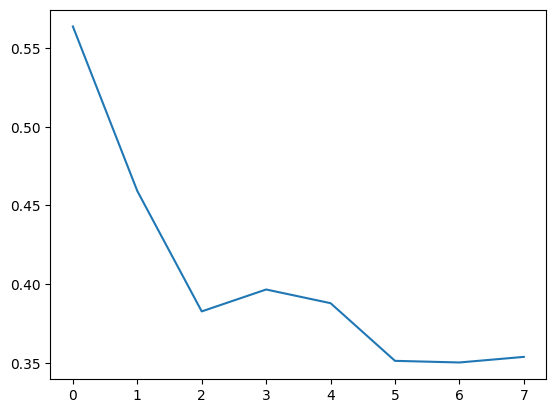

In [ ]:
from matplotlib import pyplot as plt

plt.plot(losses)
plt.show()

In [ ]:
model.save('detecto_vhr_finetune.pth')

If you have computation limitation and want to skip the model training, we can use a pre-trained model that has already been trained on the NWPU-VHR dataset. Download the model from huggingface.

In [16]:
!wget https://huggingface.co/jgillan/detecto_vhr_finetune/resolve/main/detecto_vhr_finetune.pth

--2024-09-18 23:22:28--  https://huggingface.co/jgillan/detecto_vhr_finetune/resolve/main/detecto_vhr_finetune.pth
Resolving huggingface.co (huggingface.co)... 99.84.66.72, 99.84.66.65, 99.84.66.112, ...
Connecting to huggingface.co (huggingface.co)|99.84.66.72|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/2a/1b/2a1b5d6471b63cd92461ef557884bccd94e9c0ccc0f6a3aa37af756b838e38fb/528abd6a688d57c2b166157465f52c50f08ff48613b3e09580dbea9bff5c9215?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27detecto_vhr_finetune.pth%3B+filename%3D%22detecto_vhr_finetune.pth%22%3B&Expires=1726960948&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNjk2MDk0OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzJhLzFiLzJhMWI1ZDY0NzFiNjNjZDkyNDYxZWY1NTc4ODRiY2NkOTRlOWMwY2NjMGY2YTNhYTM3YWY3NTZiODM4ZTM4ZmIvNTI4YWJkNmE2ODhkNTdjMmIxNjYxNTc0NjVmNTJjNTBmMDhmZjQ4NjEz

In [17]:
#Load pre-trained model from hugging face
model = Model.load('detecto_vhr_finetune.pth', labels)

/usr/local/lib/python3.10/dist-packages/detecto/core.py:617: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model._model.load_state_dict(torch.load(file, map_location=model._

Now that the model is trained, we can run it on a few test images to check the performance. One trade off of using **detecto** is that it does not give you access to the PyTorch methods that allow you to calculate accuracy on the test set, so this will be a qualitative check rather than a quantitative one. If your project requires this, I'd suggest using detecto as a first pass at seeing if this architecture will work for your task, and if so, a second pass using PyTorch is in order.

In [18]:
images = [] #create an empty list
for i in range(4,8): #  create a for loop that will grab 4 images from the validation dataset
    image, _ = val_dataset[i]
    images.append(image)

top_predictions= model.predict_top(images) # Predict objects on the 4 validation images

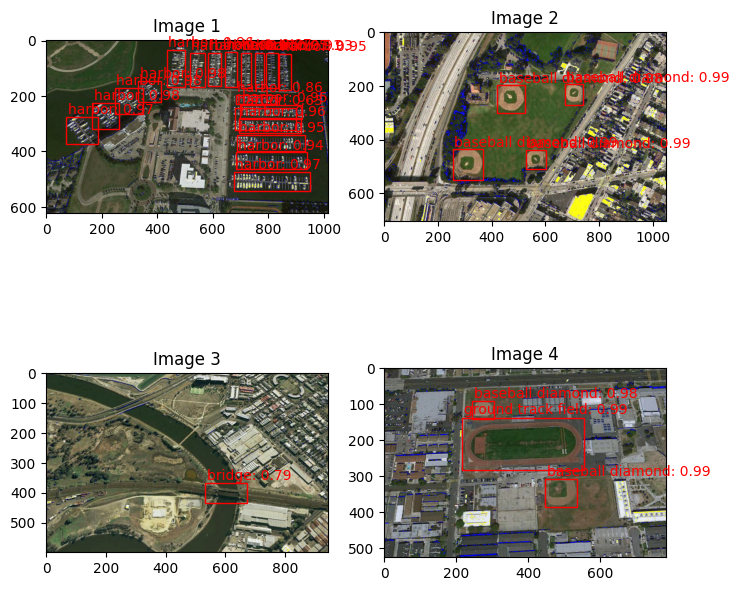

In [19]:
#Display 4 validation images and show the predicted bounding box and label.

from detecto.visualize import plot_prediction_grid

plot_prediction_grid(model, images, dim=(2, 2), figsize=(8, 8))

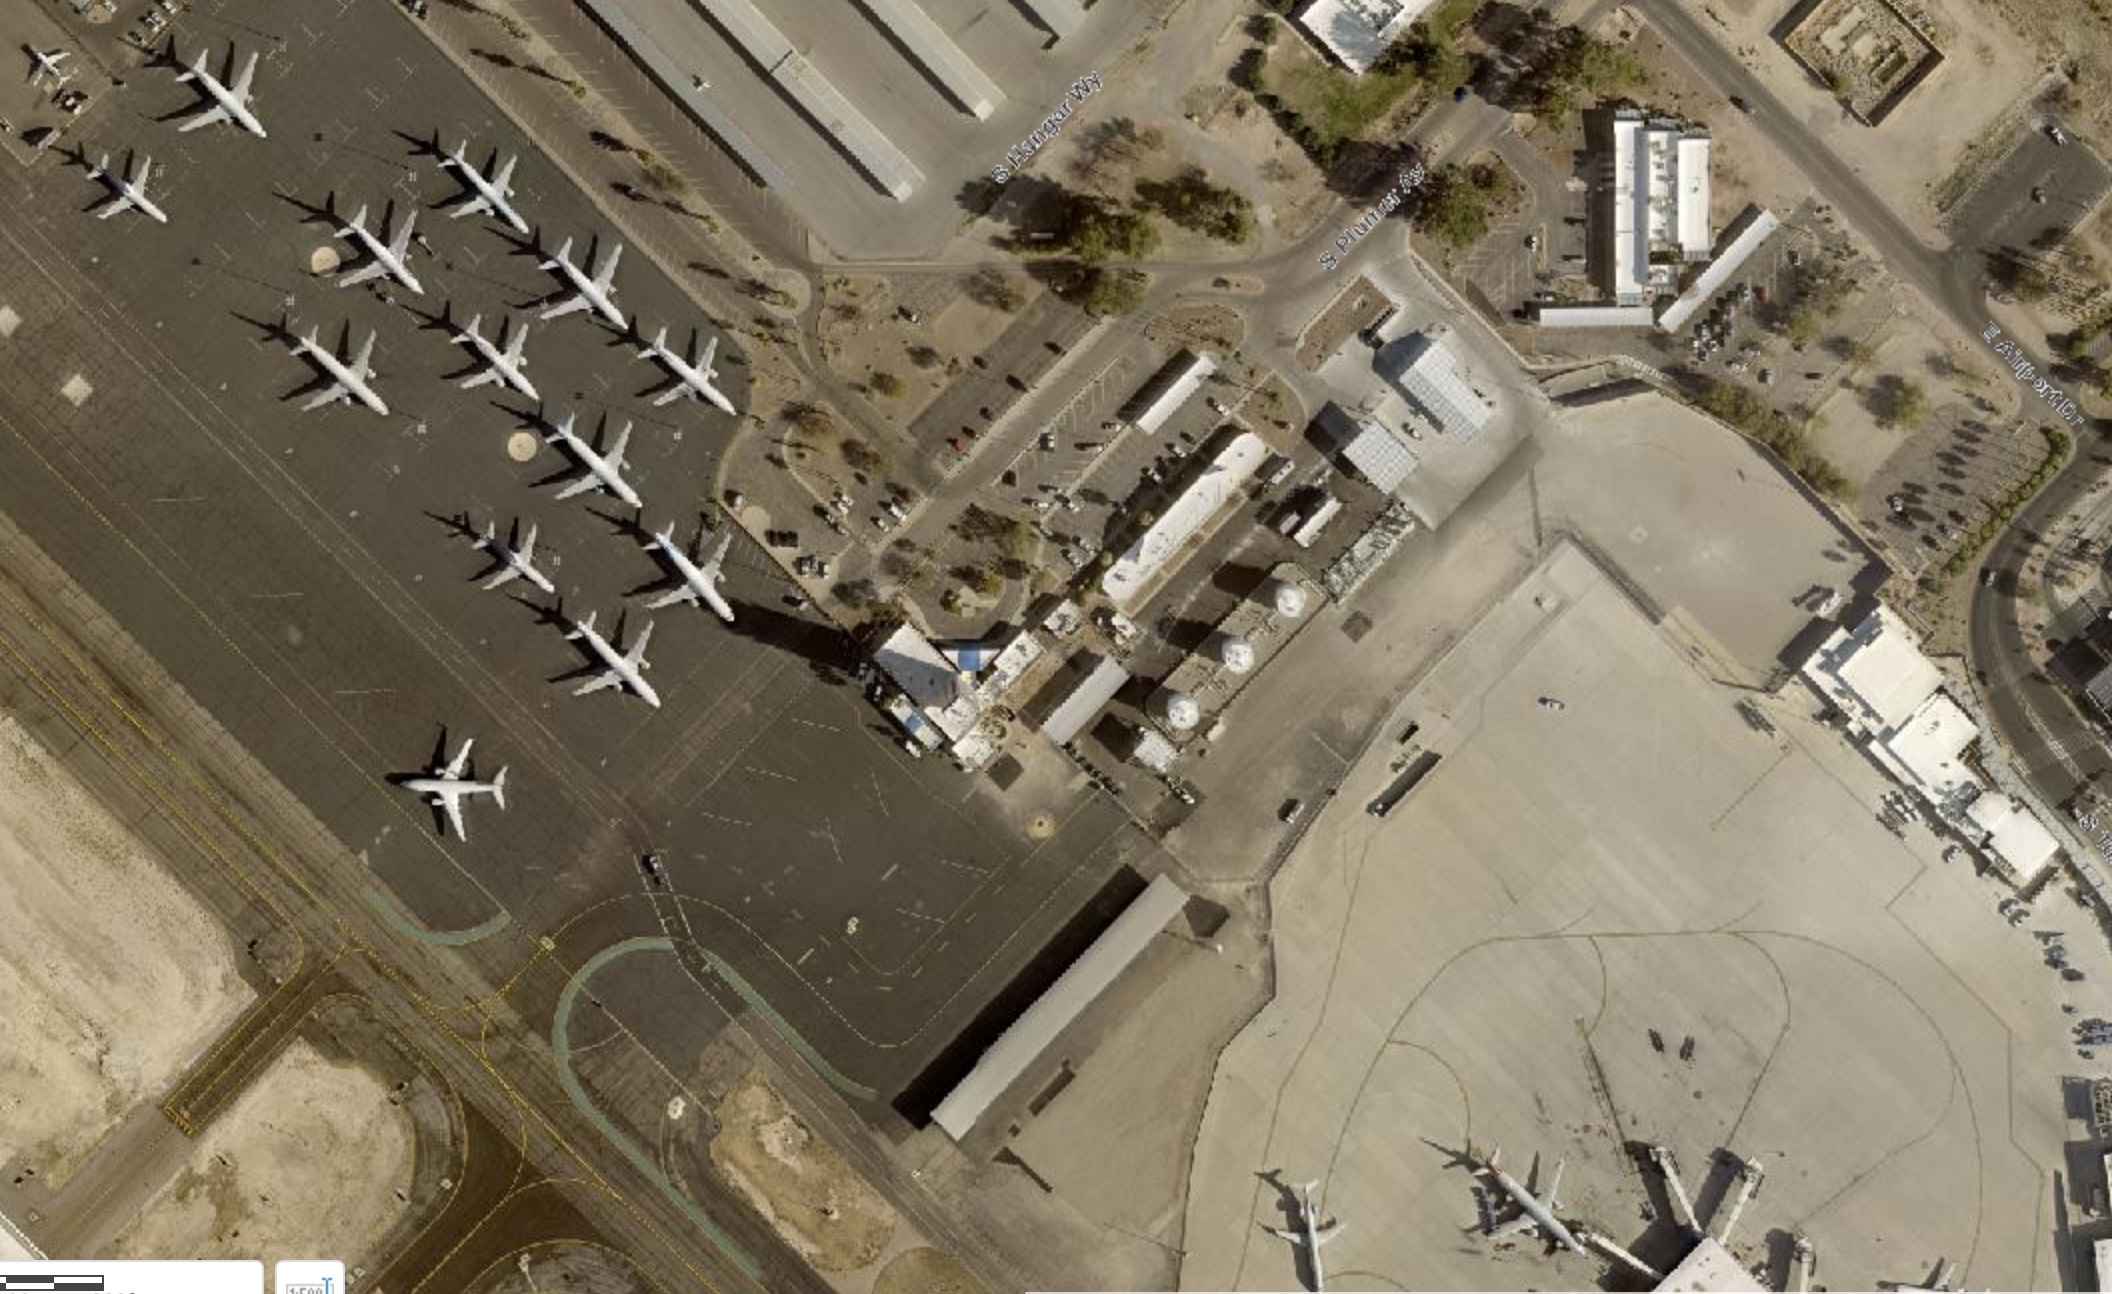

In [20]:
import urllib.request
from PIL import Image
import IPython.display as display

# Replace the URL with the actual link to your .png file
url = 'https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/airplane_test.png'
urllib.request.urlretrieve(url, 'airplane_test.png')

# Load and display the image
image = Image.open('airplane_test.png')
display.display(image)


--2024-09-19 00:22:47--  https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/airplane_test.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3119258 (3.0M) [image/png]
Saving to: ‘airplane_test.png.3’

airplane_test.png.3 100%[===================>]   2.97M  --.-KB/s    in 0.05s   

2024-09-19 00:22:47 (55.0 MB/s) - ‘airplane_test.png.3’ saved [3119258/3119258]



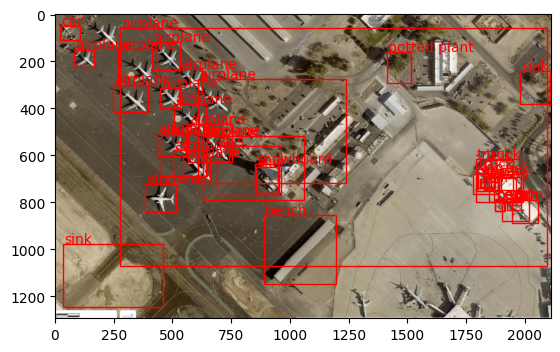

In [31]:
from detecto.core import Model
from detecto.utils import read_image
from detecto.visualize import show_labeled_image


!wget https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/airplane_test.png


image = read_image('airplane_test.png')
labels, boxes, scores = model.predict(image)
show_labeled_image(image, boxes, labels)

--2024-09-18 23:33:57--  https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/vehicle_test2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2200853 (2.1M) [image/png]
Saving to: ‘vehicle_test2.png’

vehicle_test2.png   100%[===================>]   2.10M  --.-KB/s    in 0.06s   

2024-09-18 23:33:58 (37.7 MB/s) - ‘vehicle_test2.png’ saved [2200853/2200853]



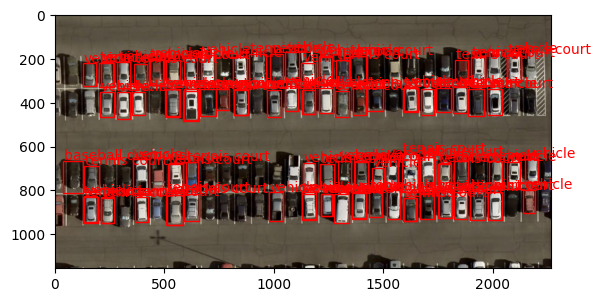

In [23]:
!wget https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/vehicle_test2.png

image = read_image('vehicle_test2.png')
labels, boxes, scores = model.predict(image)
show_labeled_image(image, boxes, labels)

--2024-09-18 23:38:45--  https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/baseball_field_test.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3431791 (3.3M) [image/png]
Saving to: ‘baseball_field_test.png’

baseball_field_test 100%[===================>]   3.27M  --.-KB/s    in 0.06s   

2024-09-18 23:38:46 (58.4 MB/s) - ‘baseball_field_test.png’ saved [3431791/3431791]



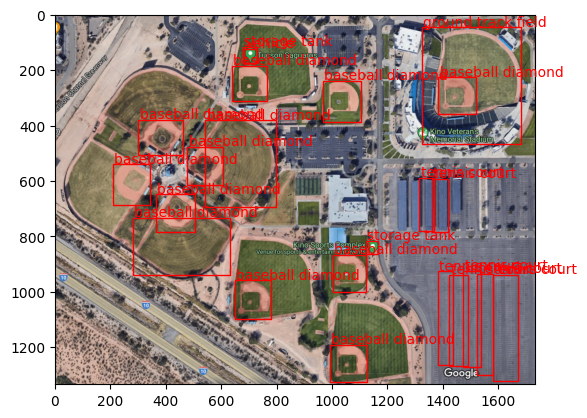

In [24]:
!wget https://raw.githubusercontent.com/ua-datalab/Geospatial_Workshops/main/data/baseball_field_test.png

image = read_image('baseball_field_test.png')
labels, boxes, scores = model.predict(image)
show_labeled_image(image, boxes, labels)